<a href="https://colab.research.google.com/github/hugoalexg/Python-for-Data-Science-and-Machine-Learning-Bootcamp/blob/main/13_Logistic_Regression_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this lecture we will be working with the Titanic Data Set from Kaggle. This is a very famous data set and very often is a student's first step in machine learning! 
We'll be trying to predict a classification- survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.
We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

Let's import some libraries to get started!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
sns.set()

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [ ]:
train = pd.read_csv('/content/drive/My Drive/Python for Data Science and Machine Learning Bootcamp/Files/titanic_train.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's begin some exploratory data analysis! We'll start by checking out missing data!

We can use seaborn to create a simple heatmap to see where we are missing data!

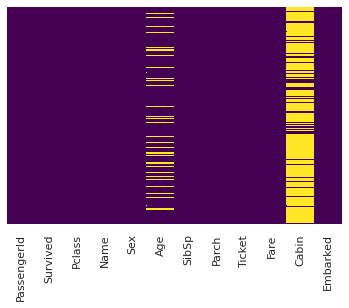

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"
Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

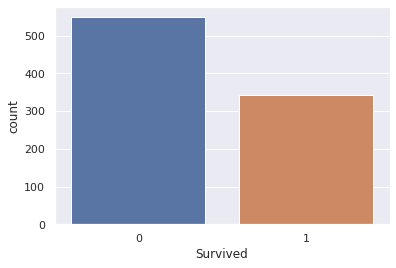

In [ ]:
sns.countplot(x='Survived', data=train)

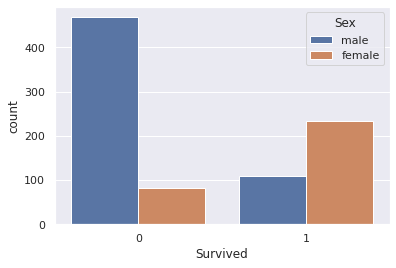

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=train)

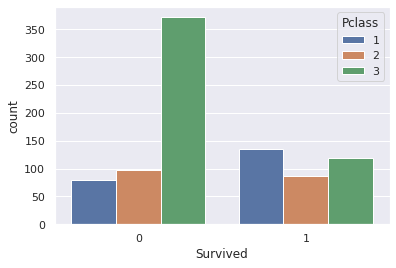

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


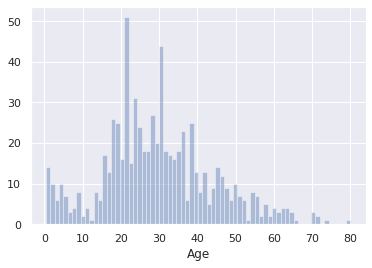

In [ ]:
sns.distplot(train['Age'].dropna(), kde=False, bins=70)

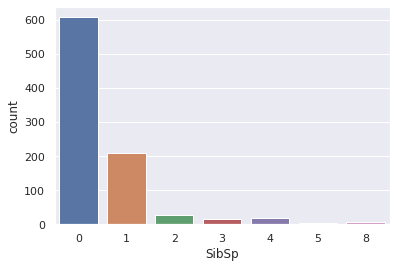

In [ ]:
sns.countplot(x='SibSp',data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


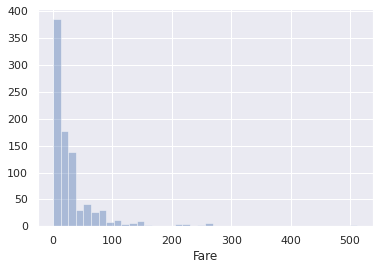

In [ ]:
sns.distplot(train['Fare'], kde=False, bins=40)

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

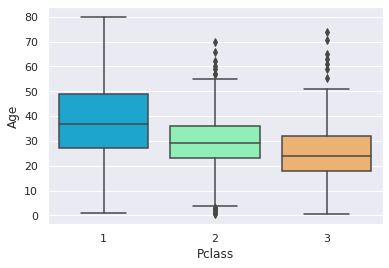

In [ ]:
sns.boxplot(x='Pclass',y='Age', data=train, palette='rainbow')

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [ ]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:
Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
Maybe the Cabin letter could be a feature
Is there any info you can get from the ticket?

In [ ]:
def ret_title(name):
	title = name.split(',')[1].split()[0]

	if title == 'Mr.':
		return 1
	elif title == 'Miss.':
		return 2
	elif title == 'Mrs.':
		return 3
	elif title == 'Master.':
		return 4
	else:
		return 5

In [ ]:
train['Title'] = train['Name'].apply(ret_title)

In [ ]:
def verif_cabin(cabin):
	if pd.isnull(cabin):
		return 0
	else: 
		return 1

In [ ]:
train['Cabin'] = train['Cabin'].apply(verif_cabin)

In [ ]:
train.dropna(inplace=True)

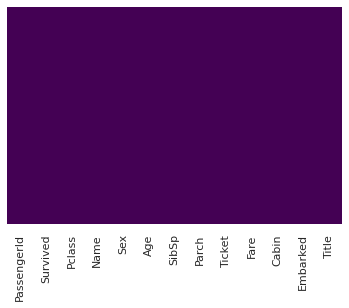

In [ ]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'], axis=1, inplace=True)
train = pd.concat([train,sex,embark],axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Title,male,Q,S
0,0,3,22.0,1,0,7.2500,0,1,1,0,1
1,1,1,38.0,1,0,71.2833,1,3,0,0,0
2,1,3,26.0,0,0,7.9250,0,2,0,0,1
3,1,1,35.0,1,0,53.1000,1,3,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,1,0,1


Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.30, random_state=101)


Training and Predicting


In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



Let's move on to evaluate our model!

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267

[[150  13]
 [ 31  73]]
